https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019?resource=download
This is the reference of dataset

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
df = pd.read_csv("songs_normalize.csv")
print(df.head())

           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000          0.000018    0

In [ ]:
pip install sequence-mining

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.4/242.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 kB 29.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=471c49ee5a73cc03d0d121f60ac570824af889f4bad9bfe362812179c09a8a3c
  Stored in directory: /root/.cache/pip/wheels/22/73/06/557dc4f4ef68179b9d763930d6eec26b88ed7c389b19588a1c
Successfully built future
  Attempting uninstall: future
    Found existing installation: future 0.18.3
    Uninstalling future-0.18.3:
      Successfully uninstalled future-0.18.3


In [ ]:
pip install -U prefixspan

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11221 sha256=04bdaa898ca9407d6b218fe9dfd8364ca9eb92a5303849b15e26543b63e1aed7
  Stored in directory: /root/.cache/pip/wheels/bf/96/ee/9e087a6d0d3163ee363c069bf80eaa4ca4f5ee51f2b2b0521c
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=6e21c2d3bcfd82d6f4a5ce7f1132a8b34c64964b5bd1927a8ab5c7c7b3d636dd
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for extratools: filename=extratools-0.8.2.1-py3-none-any.whl size=28866 sha256=2d26a1c93ead9da278c9a073afca0726a7acdba89fe0c98d422634628bf453ce
  Stored in directory: /root/.cache/pip/wheels/70/f3/03/3a98db17111f679c3291413b81d2a1e6e1bad5a3441175ace7
Successfully built prefixspan docopt extratools


In [ ]:
df.count()

artist              2000
song                2000
duration_ms         2000
explicit            2000
year                2000
popularity          2000
danceability        2000
energy              2000
key                 2000
loudness            2000
mode                2000
speechiness         2000
acousticness        2000
instrumentalness    2000
liveness            2000
valence             2000
tempo               2000
genre               2000
dtype: int64

In [ ]:
df.isna().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [ ]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

artist : ['Britney Spears' 'blink-182' 'Faith Hill' 'Bon Jovi' '*NSYNC' 'Sisqo'
 'Eminem' 'Robbie Williams' "Destiny's Child" 'Modjo' "Gigi D'Agostino"
 'Eiffel 65' "Bomfunk MC's" 'Sting' 'Melanie C' 'Aaliyah' 'Anastacia'
 'Alice Deejay' 'Dr. Dre' 'Linkin Park' 'Tom Jones' 'Sonique' 'M.O.P.'
 'Limp Bizkit' 'Darude' 'Da Brat' 'Moloko' 'Chicane' 'DMX'
 'Debelah Morgan' 'Madonna' 'Ruff Endz' 'Montell Jordan' 'Kylie Minogue'
 'JAY-Z' 'LeAnn Rimes' 'Avant' 'Enrique Iglesias' 'Toni Braxton' 'Bow Wow'
 'Missy Elliott' 'Backstreet Boys' 'Samantha Mumba' 'Mýa' 'Mary Mary'
 'Next' 'Janet Jackson' 'Ricky Martin' 'Jagged Edge' 'Mariah Carey'
 'Baha Men' 'Donell Jones' 'Oasis' 'DJ Ötzi' 'P!nk' 'Craig David'
 'Christina Aguilera' 'Red Hot Chili Peppers' 'Sammie' 'Santana' 'Kandi'
 'Vengaboys' 'Ronan Keating' 'Madison Avenue' 'Céline Dion' '3 Doors Down'
 'Carl Thomas' 'Mystikal' 'Fuel' 'Savage Garden' 'Westlife' 'All Saints'
 'Erykah Badu' 'Marc Anthony' 'Matchbox Twenty' 'Gabrielle' 'Creed'
 'The C

In [ ]:
duplicate_rows = df[df.duplicated(subset=['song','artist'], keep=False)]

In [ ]:
print(duplicate_rows)

               artist                      song  duration_ms  explicit  year  \
20        Linkin Park                In the End       216880     False  2000   
36      Kylie Minogue           Spinning Around       207866     False  2000   
63        Craig David                Fill Me In       257200     False  2000   
85    Destiny's Child  Independent Women, Pt. 1       221133     False  2001   
90          Gabrielle                      Rise       219093     False  2001   
...               ...                       ...          ...       ...   ...   
1855          Cardi B              Bodak Yellow       223712      True  2018   
1861      Post Malone                Better Now       231266      True  2018   
1921     Travis Scott                SICKO MODE       312820      True  2018   
1929    Billie Eilish      lovely (with Khalid)       200185     False  2018   
1984      Post Malone                Better Now       231266      True  2018   

      popularity  danceability  energy 

In [ ]:
constraint_field = 'artist'
constraint_value = 'Linkin Park'
filtered_df = df.loc[df[constraint_field] == constraint_value]
print(filtered_df)

           artist                song  duration_ms  explicit  year  \
20    Linkin Park          In the End       216880     False  2000   
215   Linkin Park          In the End       216880     False  2000   
316   Linkin Park               Faint       162600     False  2003   
416   Linkin Park                Numb       185586     False  2003   
441   Linkin Park  Breaking the Habit       196906     False  2003   
730   Linkin Park      What I've Done       205613     False  2007   
743   Linkin Park        Bleed It Out       166373      True  2007   
927   Linkin Park          New Divide       268613     False  2009   
1226  Linkin Park        BURN IT DOWN       230253     False  2012   

      popularity  danceability  energy  key  loudness  mode  speechiness  \
20            83         0.556   0.864    3    -5.870     0       0.0584   
215           83         0.556   0.864    3    -5.870     0       0.0584   
316           72         0.554   0.978    4    -3.554     1       0.131

In [ ]:
df.drop_duplicates(subset=['song', 'artist'], inplace=True)

In [ ]:
df.count()

artist              1926
song                1926
duration_ms         1926
explicit            1926
year                1926
popularity          1926
danceability        1926
energy              1926
key                 1926
loudness            1926
mode                1926
speechiness         1926
acousticness        1926
instrumentalness    1926
liveness            1926
valence             1926
tempo               1926
genre               1926
dtype: int64

In [ ]:
x=df.copy()

In [ ]:
x= x.drop(['artist','explicit','popularity','year','duration_ms','song'],axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
x.head(15)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,pop
1,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,"rock, pop"
2,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,"pop, country"
3,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.544,119.992,"rock, metal"
4,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.879,172.656,pop
5,0.706,0.888,2,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.714,121.549,"hip hop, pop, R&B"
6,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
7,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.4670,0.861,103.035,"pop, rock"
8,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,"pop, R&B"
9,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.869,126.041,Dance/Electronic


In [ ]:

# Extracting the unique genres from the 'genre' column
unique_genres = x['genre'].str.split(',').explode().str.strip().unique()

# Creating binary columns for each unique genre (0,1)
for genre in unique_genres:
    x[genre] = x['genre'].str.contains(genre).astype(int)

# Fill Null with 0 in the binary genre columns
x[unique_genres] = x[unique_genres].fillna(0)

# Dropping the original 'genre' column for clustering
x = x.drop('genre', axis=1)

<ipython-input-15-7ea967c71d75>:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  x[genre] = x['genre'].str.contains(genre).astype(int)


In [ ]:
pd.set_option('display.max_columns', None)   #display all column
x.head(15)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,pop,rock,country,metal,hip hop,R&B,Dance/Electronic,Folk/Acoustic,easy listening,latin,blues,set(),World/Traditional,jazz,classical
0,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.544,119.992,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.879,172.656,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.706,0.888,2,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.714,121.549,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
6,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.4670,0.861,103.035,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.869,126.041,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
print(unique_genres)

['pop' 'rock' 'country' 'metal' 'hip hop' 'R&B' 'Dance/Electronic'
 'Folk/Acoustic' 'easy listening' 'latin' 'blues' 'set()'
 'World/Traditional' 'jazz' 'classical']


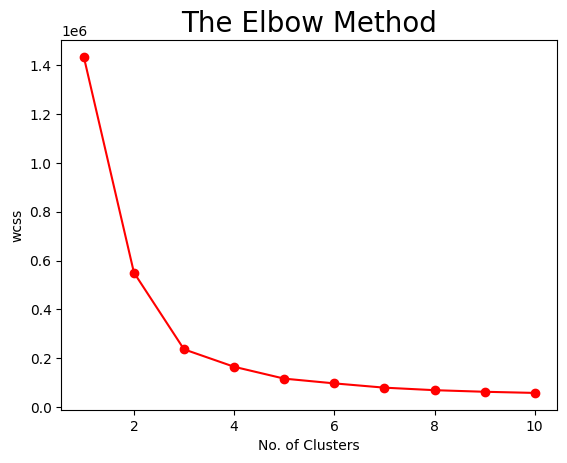

In [ ]:

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


In [ ]:
#we will use 4 clusters.
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(x)

# Get the cluster labels for the fitted data
labels = km.labels_
labels

array([1, 0, 0, ..., 1, 1, 3], dtype=int32)

In [ ]:
# We'll assign the cluster labels to a new column called 'cluster' in our original dataframe
df['cluster'] = labels

# show all results
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df.groupby('cluster').describe()

duration_ms                                                                        \
              count           mean           std       min        25%       50%       75%   
cluster                                                                                     
0             311.0  228764.598071  41516.300046  113000.0  201683.50  221440.0  250415.5   
1             714.0  231171.841737  39391.178030  121886.0  207009.50  227193.0  251939.5   
2             197.0  229932.822335  41961.724363  131240.0  202066.00  225520.0  250533.0   
3             704.0  225678.413352  37247.103253  124055.0  202190.25  220259.5  244289.5   

                    year                                                                 \
              max  count         mean       std     min     25%     50%     75%     max   
cluster                                                                                   
0        352173.0  311.0  2010.102894  5.920633  1999.0  2005.0  2010.0  2016.0  2019.0   
1        484146.0  714.0  2008.742297  6.301738  1998.0  2003.0  2007.0  2015.0  2020.0   
2        366733.0  197.0  2009.477157  6.173159  1999.0  2004.0  2009.0  2015.0  2020.0   
3        452906.0  704.0  2009.988636  5.219766  1999.0  2006.0  2011.0  2014.0  2019.0   

        popularity                                                    danceability            \
             count       mean        std  min   25%   50%   75%   max        count      mean   
cluster                                                                                        
0            311.0  60.932476  20.574301  0.0  58.0  67.0  73.0  85.0        311.0  0.643315   
1            714.0  60.092437  20.680970  0.0  56.0  65.0  73.0  86.0        714.0  0.677175   
2            197.0  61.609137  19.325475  0.0  58.0  67.0  74.0  85.0        197.0  0.566904   
3            704.0  58.115057  23.007380  0.0  55.0  64.0  73.0  89.0        704.0  0.697669   

                                                         energy                              \
              std    min      25%     50%     75%    max  count      mean       std     min   
cluster                                                                                       
0        0.137711  0.285  0.54300  0.6410  0.7325  0.933  311.0  0.722630  0.161557  0.0549   
1        0.139585  0.129  0.59725  0.6865  0.7770  0.970  714.0  0.686641  0.147855  0.2470   
2        0.148353  0.177  0.45800  0.5670  0.6800  0.865  197.0  0.741762  0.149706  0.0581   
3        0.124627  0.272  0.61400  0.7045  0.7835  0.975  704.0  0.752041  0.148296  0.1150   

                                           key                                                \
             25%     50%     75%    max  count      mean       std  min  25%  50%  75%   max   
cluster                                                                                        
0        0.61600  0.7400  0.8445  0.999  311.0  5.344051  3.633263  0.0  2.0  5.0  8.0  11.0   
1        0.59025  0.6990  0.8000  0.974  714.0  5.383754  3.586411  0.0  2.0  6.0  8.0  11.0   
2        0.65300  0.7510  0.8600  0.988  197.0  5.192893  3.716119  0.0  2.0  5.0  8.0  11.0   
3        0.66900  0.7825  0.8620  0.985  704.0  5.404830  3.616310  0.0  2.0  6.0  8.0  11.0   

        loudness                                                               mode            \
           count      mean       std     min      25%     50%     75%    max  count      mean   
cluster                                                                                         
0          311.0 -5.601125  2.016243 -20.514 -6.63100 -5.4020 -4.1655 -0.276  311.0  0.610932   
1          714.0 -5.714357  1.940964 -15.636 -6.65825 -5.5435 -4.3560 -1.730  714.0  0.529412   
2          197.0 -5.204797  1.874102 -17.217 -6.12700 -5.0470 -4.1300 -0.740  197.0  0.609137   
3          704.0 -5.346159  1.907865 -14.505 -6.34400 -5.0715 -4.0290 -1.190  704.0  0.536932   

                          

In [ ]:
df.groupby('cluster').describe(include='object')


artist                             song                               genre              \
         count unique            top freq count unique               top freq count unique  top   
cluster                                                                                           
0          311    229          Drake    6   311    309             Mercy    2   311     31  pop   
1          714    405     Kanye West   12   714    704           Perfect    2   714     45  pop   
2          197    154          Nelly    5   197    196  Miss Independent    2   197     25  pop   
3          704    407  Calvin Harris   19   704    697      It's My Life    2   704     42  pop   

              
        freq  
cluster       
0         71  
1        138  
2         42  
3        160

In [ ]:
pd.set_option('display.max_columns', None)
x.head(15)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,pop,rock,country,metal,hip hop,R&B,Dance/Electronic,Folk/Acoustic,easy listening,latin,blues,set(),World/Traditional,jazz,classical
0,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.544,119.992,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.879,172.656,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.706,0.888,2,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.714,121.549,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
6,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.4670,0.861,103.035,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.869,126.041,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
#sns.pairplot(df);

In [ ]:
 print(df.iloc[751
               ])


artist                              Plies
song                Shawty (feat. T Pain)
duration_ms                        255413
explicit                             True
year                                 2007
popularity                             61
danceability                        0.444
energy                              0.708
key                                     4
loudness                           -5.926
mode                                    0
speechiness                         0.126
acousticness                       0.0419
instrumentalness                      0.0
liveness                           0.0775
valence                              0.26
tempo                             105.412
genre                   hip hop, pop, R&B
cluster                                 1
Name: 774, dtype: object


In [ ]:
def generate_random_sequence(cluster_df, num_songs):
    return random.sample(cluster_df.index.tolist(), num_songs)

num_sequences = 100000



all_sequences = []
for cluster_id in range(3):  #  4 clusters
    cluster_df = df[df['cluster'] == cluster_id]
    for _ in range(num_sequences):
        sequence_length = random.randint(5, 15)  # Sequence contains 5-15 songs as a listening history
        sequence = generate_random_sequence(cluster_df, sequence_length)
        all_sequences.append(sequence)

#1mill random listening sequences

In [ ]:
# target_song_id = [1999]
# sorted_patterns = sorted(frequent_patterns, key=lambda x: x[0])

# for pattern, support in sorted_patterns:
#     if len(support) <= 1:
#         continue
#     if all(id in support for id in target_song_id):
#         print(f"Pattern: {pattern}, Support: {support}")
# #THIS IS ALL THE PATTERNS FOR A SONG

In [ ]:
from prefixspan import PrefixSpan
ps = PrefixSpan(all_sequences)
min_pattern = 100
frequent_patterns = ps.frequent(min_pattern)
# for pattern, support in frequent_patterns:
#    if len(support) <= 1:
#      continue
#    print(f"Pattern: {pattern}, Support: {support}")

In [ ]:
#All artist in Dataframe.
print(df['artist'].unique())

['Britney Spears' 'blink-182' 'Faith Hill' 'Bon Jovi' '*NSYNC' 'Sisqo'
 'Eminem' 'Robbie Williams' "Destiny's Child" 'Modjo' "Gigi D'Agostino"
 'Eiffel 65' "Bomfunk MC's" 'Sting' 'Melanie C' 'Aaliyah' 'Anastacia'
 'Alice Deejay' 'Dr. Dre' 'Linkin Park' 'Tom Jones' 'Sonique' 'M.O.P.'
 'Limp Bizkit' 'Darude' 'Da Brat' 'Moloko' 'Chicane' 'DMX'
 'Debelah Morgan' 'Madonna' 'Ruff Endz' 'Montell Jordan' 'Kylie Minogue'
 'JAY-Z' 'LeAnn Rimes' 'Avant' 'Enrique Iglesias' 'Toni Braxton' 'Bow Wow'
 'Missy Elliott' 'Backstreet Boys' 'Samantha Mumba' 'Mýa' 'Mary Mary'
 'Next' 'Janet Jackson' 'Ricky Martin' 'Jagged Edge' 'Mariah Carey'
 'Baha Men' 'Donell Jones' 'Oasis' 'DJ Ötzi' 'P!nk' 'Craig David'
 'Christina Aguilera' 'Red Hot Chili Peppers' 'Sammie' 'Santana' 'Kandi'
 'Vengaboys' 'Ronan Keating' 'Madison Avenue' 'Céline Dion' '3 Doors Down'
 'Carl Thomas' 'Mystikal' 'Fuel' 'Savage Garden' 'Westlife' 'All Saints'
 'Erykah Badu' 'Marc Anthony' 'Matchbox Twenty' 'Gabrielle' 'Creed'
 'The Corrs' 'Jo

In [ ]:
from prefixspan import PrefixSpan
ps2 = PrefixSpan(all_sequences)
min_pattern2 = 10
triple_patterns = ps2.frequent(min_pattern2)


In [ ]:
target_artist = input("Enter the artist name: ")
constraint_field = 'artist'
constraint_value = target_artist
filtered_df = df.loc[df[constraint_field] == constraint_value]
print(filtered_df)

Enter the artist name: 8
Empty DataFrame
Columns: [artist, song, duration_ms, explicit, year, popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, genre, cluster]
Index: []


In [ ]:
#after entering a song, you like, returns the best song based on highest sequence
target_song_id = int(input("Enter the target song ID: "))
highest_pattern_number = -1
recommended_song = None
for pattern, support in frequent_patterns:
    if len(support) <= 1:
        continue
    if target_song_id in support:
        pattern_index = support.index(target_song_id)
        if pattern > highest_pattern_number:
            highest_pattern_number = pattern
            song_index = pattern_index + 1
            if song_index < len(support):
                recommended_song_id = support[song_index]
                recommended_song_details = df.loc[recommended_song_id]
                recommended_song = (highest_pattern_number, recommended_song_details)

if recommended_song:
    print(f"Highest Pattern Number : {recommended_song[0]}")
    print("Recommended Song Details: " )
    print(recommended_song[1])
else:
    print("No matching pattern found.")


Enter the target song ID: 8
No matching pattern found.


In [ ]:
#These are 3 patterns if the 2nd was good
like = int(input("Did you like the song? 1 if good 0 if bad "))
if like == 1:
  target_song_id1 = target_song_id
  target_song_id2 = recommended_song_id

  highest_pattern_number = -1
  recommended_song = None

  for pattern, support in triple_patterns:
      if len(support) <= 2:
          continue
      if target_song_id1 in support and target_song_id2 in support:
          index_1 = support.index(target_song_id1)
          index_2 = support.index(target_song_id2)
          if index_2 == index_1 + 1:
              pattern_index = index_2 + 1
              if pattern > highest_pattern_number:
                  highest_pattern_number = pattern
                  if pattern_index < len(support):
                      recommended_song_id = support[pattern_index]
                      recommended_song_details1 = df.loc[recommended_song_id]
                      recommended_song = (highest_pattern_number, recommended_song_details1)

  if recommended_song:
      print(f"Highest Pattern Number : {recommended_song[0]}")
      print("Recommended Song Details: ")
      print(recommended_song[1])
  else:
      print("No matching pattern found.")
else:
  print("Sorry :(")

Did you like the song? 1 if good 0 if bad 0
Sorry :(
